## Цветков Николай Максимович. Вариант №4
### Лабораторная работа №3. Методы классификации данных

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('4_iris/iris.data.txt', 
                   names = ["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.count()

SepalLength    150
SepalWidth     150
PetalLength    150
PetalWidth     150
Species        150
dtype: int64

### 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)
**Набор данных Iris:**  
Он включает в себя три вида ирисов, по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы друг от друга линейно.  
  
Параметры:  
SepalLength - длина чаши в см  
SepalWidth - Ширина чаши в см  
PetalLength - Длина лепестка в см  
PetalWidth - Ширина лепестка в см  
Species - Разновидность  
  
Разновидности: Iris Setosa, Iris Versicolour, Iris Virginica  
Лишних признаков нет  
Задача: необходимо предсказать по данным признакам класс растения

### 2) Удалите дубликаты строк в наборе данных

In [5]:
df = df.drop_duplicates()
df.shape

(147, 5)

In [6]:
df.count()

SepalLength    147
SepalWidth     147
PetalLength    147
PetalWidth     147
Species        147
dtype: int64

### 3) Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)¶

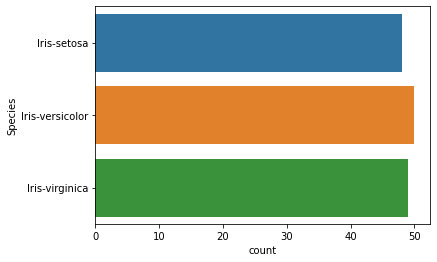

In [7]:
sns.countplot(data=df, y='Species')
plt.show()

### 4) Выполните масштабирование количественных признаков

In [8]:
numericalColumns = [i for i in df.columns if df[i].dtype.name != 'object'] # выделим числовые(количественные) и категориальные
categorialColumns = [i for i in df.columns if df[i].dtype.name == 'object']# признаки

print('numerical: ', numericalColumns)
print('categorial: ', categorialColumns)

numerical:  ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
categorial:  ['Species']


### 5) Выполните замену категориальных признаков

In [9]:
labelEncoder = LabelEncoder() 
df["Species"] = labelEncoder.fit_transform(df["Species"])
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 6) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)¶

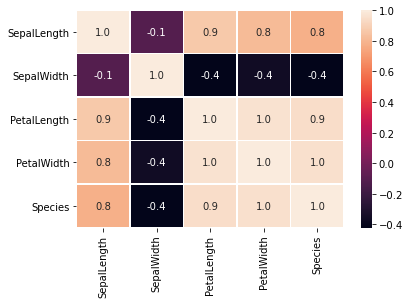

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidth,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLength,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidth,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


In [10]:
dfCorrelation = df.corr()
sns.heatmap(dfCorrelation, annot=True, fmt='.1f', linewidths = .5)
plt.show()
dfCorrelation

### 7) Заполните пропущенные значения в данных¶

Пропущенные значения отсутствуют

### 8) Решите поставленную задачу классификации в соответствии с заданием.

In [11]:
x = np.array(df.drop('Species', axis=1)) # Разделим полученные данные на данные для обучения и теста
y = np.array(df['Species']) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(73, 4)
(74, 4)


In [12]:
rnc = RadiusNeighborsClassifier(outlier_label= 1) # Найдем оптимальный радиус для классификатора ближайших соседей

params = {'radius': np.arange(0, 10, 0.1)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score, '\t at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label= 1, radius=best_radius)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score: 0.9457142857142857 	 at radius: 0.9
test score:  0.9864864864864865


In [13]:
dtc = DecisionTreeClassifier() # Найдем оптимальные глубину и количества учитываемых параметров для классификатора 
                               # решающее дерево
params = {'max_depth': list(range(1,5)), 'max_features': list(range(1,5))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)
dtc.predict(X_test)

best train score: 0.959047619047619 	 at features number: 4 	 at depth: 2
test score:  0.9459459459459459


array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1,
       0, 1, 0, 2, 2, 0, 2, 2])

In [14]:
from sklearn.metrics import accuracy_score
classifier = RadiusNeighborsClassifier(radius=0.9, n_jobs=-1, outlier_label=1).fit(X_train, y_train)
pred = classifier.predict(X_test)
accuracy_score(y_test, pred)
pred = classifier.radius_neighbors(X_test)[0]
y_test = label_binarize(y_test, classes=[0, 1, 2])
for i in range(len(pred)):
    pred[:][i] = min(pred[:][i]), max(pred[:][i]), np.mean(pred[:][i])
pred[:][73]

(0.3872983346207416, 0.8426149773176362, 0.6680429090578569)

In [15]:
class MyRadiusNeighborsClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, y_train):
      
        runs = 25
        dr = (2*self.radius/runs)    
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(y_test),3), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1, 2]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

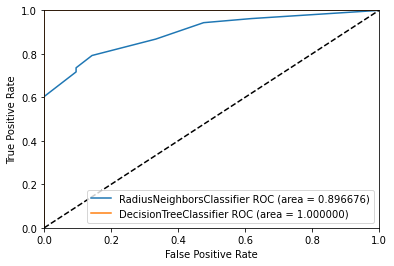

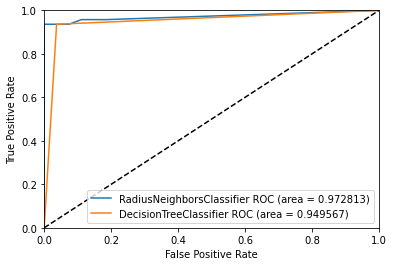

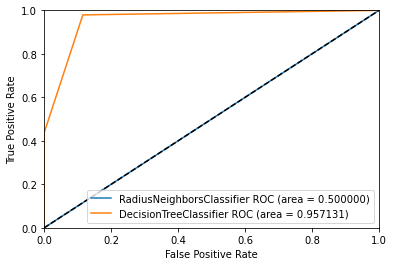

In [16]:
mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc0 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,0], -probas_mrnc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(y_test[:,0], -probas_dtc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,1], -probas_mrnc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=4, max_features=2)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(y_test[:,1], -probas_dtc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc2 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,2], -probas_mrnc0[:,2])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=4, max_features=2)
probas_dtc2 = dtc.fit(X_train, y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(y_test[:,2], -probas_dtc0[:,2])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

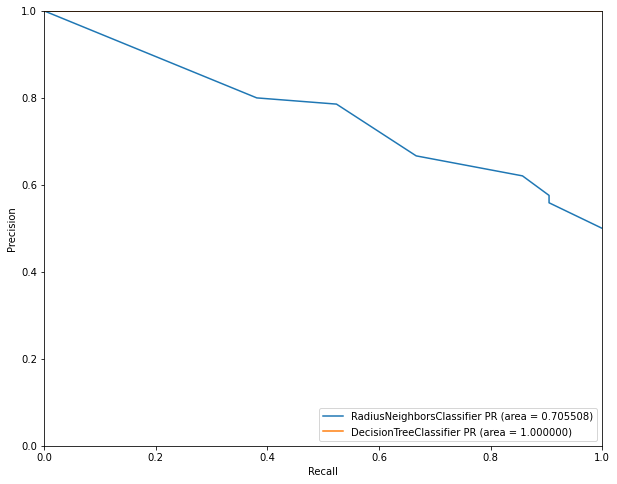

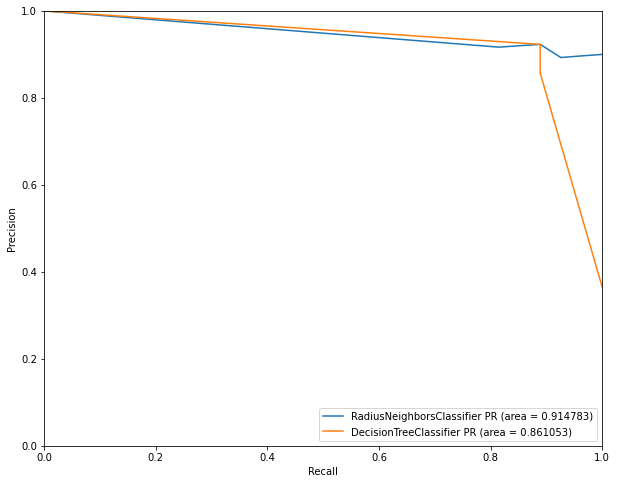

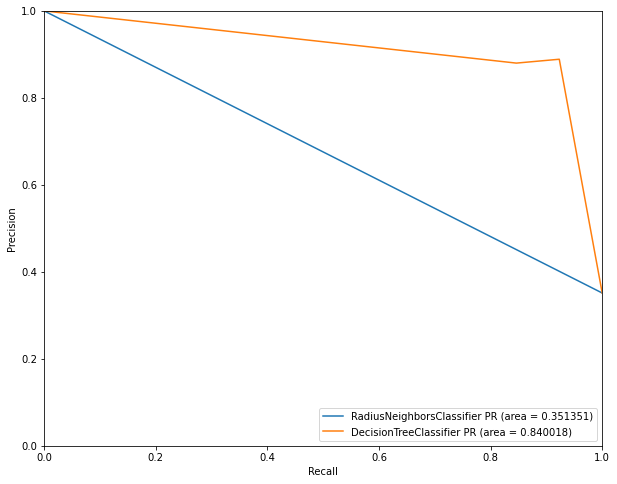

In [17]:
plt.figure(figsize=(10,8))

precision, recall, thresholds = precision_recall_curve(y_test[:,0], probas_mrnc1[:,0]) # K соседей
aps_mrnc1 = average_precision_score(y_test[:,0],probas_mrnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 

precision, recall, thresholds = precision_recall_curve(y_test[:,0], probas_dtc1[:,0]) # Решающее дерево
aps_dtc1 = average_precision_score(y_test[:,0],probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Recall') # Вывод графика
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

plt.figure(figsize=(10,8))

precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_mrnc1[:,1]) # K соседей
aps_mrnc1 = average_precision_score(y_test[:,1],probas_mrnc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 

precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_dtc1[:,1]) # Решающее дерево
aps_dtc1 = average_precision_score(y_test[:,1],probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Recall') # Вывод графика
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

plt.figure(figsize=(10,8))

precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_mrnc1[:,2]) # K соседей
aps_mrnc1 = average_precision_score(y_test[:,2],probas_mrnc1[:,2])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 

precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_dtc1[:,2]) # Решающее дерево
aps_dtc1 = average_precision_score(y_test[:,2],probas_dtc1[:,2])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Recall') # Вывод графика
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

### 9) Сравните кривые для классификаторов, указанных в задании, сделайте выводы


Классификаторы "Бинарное рещающее дерево" и "Метод k ближайших соседей(по радиусу)" примерно имеют одинаковые показатели качества относительно PR и ROC кривых. Данные классификаторы на хорошем уровне справляются со своей задачей, так как их точность ≈0.85, что достаточно далеко от 0.5. Задача классификации была решена.